# **FP Big Data**
Anggota :
*   21.11.4484 - Muhammad Sidiq Firmansyah
*   21.11.4503 - Ridho Febrian Kusnanto
*   21.11.4505 - Ahmad Nur Fauzi
*   21.11.4536 - Adhimas Yusuf Syaputra




In [ ]:
# Import Dataset
from google.colab import files
uploaded = files.upload()

Saving CPU_r23_v2.csv to CPU_r23_v2.csv


In [ ]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### **Exploratory Data Analysis**

In [ ]:
# Mendefinisikan format missing values yang mungkin ada
missing_value_format = ['N.A', 'na', 'n.a.', 'n/a', '?', '-']
# Load data dari csv
df = pd.read_csv('CPU_r23_v2.csv', na_values=missing_value_format)
df.head(10)

,manufacturer,cpuName,singleScore,multiScore,cores,threads,baseClock,turboClock,type
0,AMD,Threadripper 3990X,1262,75671,64,128,2.9,4.50,Desktop
1,AMD,Threadripper Pro 3995WX,1231,73220,64,128,2.7,4.20,Desktop
2,AMD,Epyc 7702P,993,48959,64,128,2.0,3.35,Desktop
3,AMD,Threadripper 3970X,1308,46874,32,64,3.7,4.50,Desktop
4,AMD,Threadripper Pro 3975WX,1244,43450,32,64,3.5,4.20,Desktop
5,AMD,Threadripper 3960X,1307,34932,24,64,3.8,4.50,Desktop
6,AMD,Threadripper 2990WX,1005,29651,32,64,3.0,4.20,Desktop
7,AMD,Ryzen 9 5950X,1684,28782,16,32,3.4,4.90,Desktop
8,Intel,Core i9 12900K,2007,27852,16,24,3.2,5.20,Desktop
9,Intel,Core i9 12900KF,1974,27852,16,24,3.2,5.20,Desktop


In [ ]:
# Mengetahui informasi mengenai nama kolom, jumlah data, dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  215 non-null    object 
 1   cpuName       215 non-null    object 
 2   singleScore   215 non-null    int64  
 3   multiScore    215 non-null    int64  
 4   cores         215 non-null    int64  
 5   threads       215 non-null    int64  
 6   baseClock     215 non-null    float64
 7   turboClock    215 non-null    float64
 8   type          215 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 15.2+ KB


In [ ]:
# Pengecekan terhadap duplikasi data
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
210    False
211    False
212    False
213    False
214    False
Length: 215, dtype: bool

In [ ]:
# Pengecekan terhadap data kosong
df.isnull().sum()

manufacturer    0
cpuName         0
singleScore     0
multiScore      0
cores           0
threads         0
baseClock       0
turboClock      0
type            0
dtype: int64

In [ ]:
# Memberikan Statistik Deskriptif
df.describe()

,singleScore,multiScore,cores,threads,baseClock,turboClock
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,1367.553488,12979.502326,9.367442,17.739535,3.053953,4.514651
std,239.829487,8905.742643,7.823393,15.829910,0.653009,0.441463
min,903.000000,5423.000000,4.000000,6.000000,1.100000,3.200000
25%,1207.000000,8186.500000,6.000000,12.000000,2.500000,4.200000
50%,1312.000000,10890.000000,8.000000,16.000000,3.200000,4.500000
75%,1534.000000,14393.500000,9.000000,16.000000,3.600000,4.800000
max,2082.000000,75671.000000,64.000000,128.000000,4.200000,5.500000


### **Analisis Korelasi**

In [ ]:
# Menghitung korelasi 'Pearson/Default'
print ("Korelasi Pearson/Default")
print (df.corr())

# Menghitung korelasi 'Kendall'
print ("Korelasi Kendall")
print (df.corr(method='kendall'))

# Menghitung korelasi 'Spearman'
print ("Korelasi Spearman")
print (df.corr(method='spearman'))

Korelasi Pearson/Default
             singleScore  multiScore     cores   threads  baseClock  \
singleScore     1.000000    0.165598 -0.028463 -0.087273  -0.048699   
multiScore      0.165598    1.000000  0.931470  0.924025   0.110160   
cores          -0.028463    0.931470  1.000000  0.981211  -0.040486   
threads        -0.087273    0.924025  0.981211  1.000000  -0.003516   
baseClock      -0.048699    0.110160 -0.040486 -0.003516   1.000000   
turboClock      0.527882    0.078537 -0.088361 -0.071200   0.108281   

             turboClock  
singleScore    0.527882  
multiScore     0.078537  
cores         -0.088361  
threads       -0.071200  
baseClock      0.108281  
turboClock     1.000000  
Korelasi Kendall
             singleScore  multiScore     cores   threads  baseClock  \
singleScore     1.000000    0.308011  0.113826  0.088285  -0.017242   
multiScore      0.308011    1.000000  0.706130  0.709065   0.145148   
cores           0.113826    0.706130  1.000000  0.863888  -0.0124

<ipython-input-8-fe4d2dbeebad>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print (df.corr())
<ipython-input-8-fe4d2dbeebad>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print (df.corr(method='kendall'))
<ipython-input-8-fe4d2dbeebad>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print (df.corr(method='spearman'))


<ipython-input-9-dc8d6f437cd5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


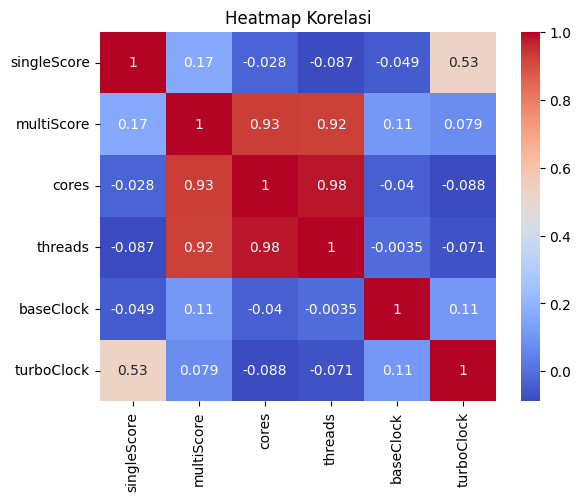

,singleScore,multiScore,cores,threads,baseClock,turboClock
singleScore,1.000000,0.165598,-0.028463,-0.087273,-0.048699,0.527882
multiScore,0.165598,1.000000,0.931470,0.924025,0.110160,0.078537
cores,-0.028463,0.931470,1.000000,0.981211,-0.040486,-0.088361
threads,-0.087273,0.924025,0.981211,1.000000,-0.003516,-0.071200
baseClock,-0.048699,0.110160,-0.040486,-0.003516,1.000000,0.108281
turboClock,0.527882,0.078537,-0.088361,-0.071200,0.108281,1.000000


In [ ]:
# Heatmap korelasi

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()
correlation_matrix


### **Visualisasi Data**

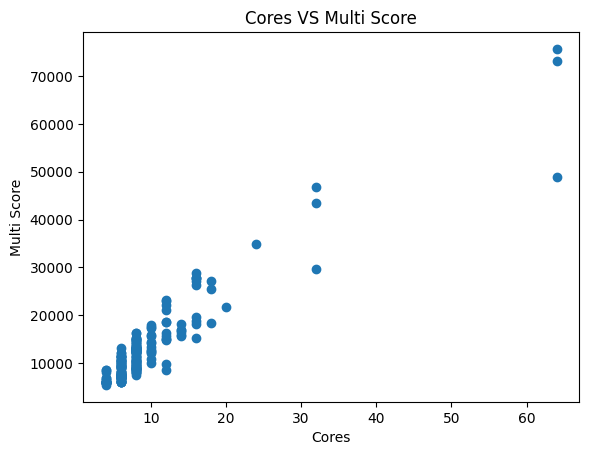

In [ ]:
# Visualisasi scatter plot Cores vs. MultiScore
plt.scatter(df['cores'], df['multiScore'])
plt.xlabel('Cores')
plt.ylabel('Multi Score')
plt.title('Cores VS Multi Score')
plt.show()

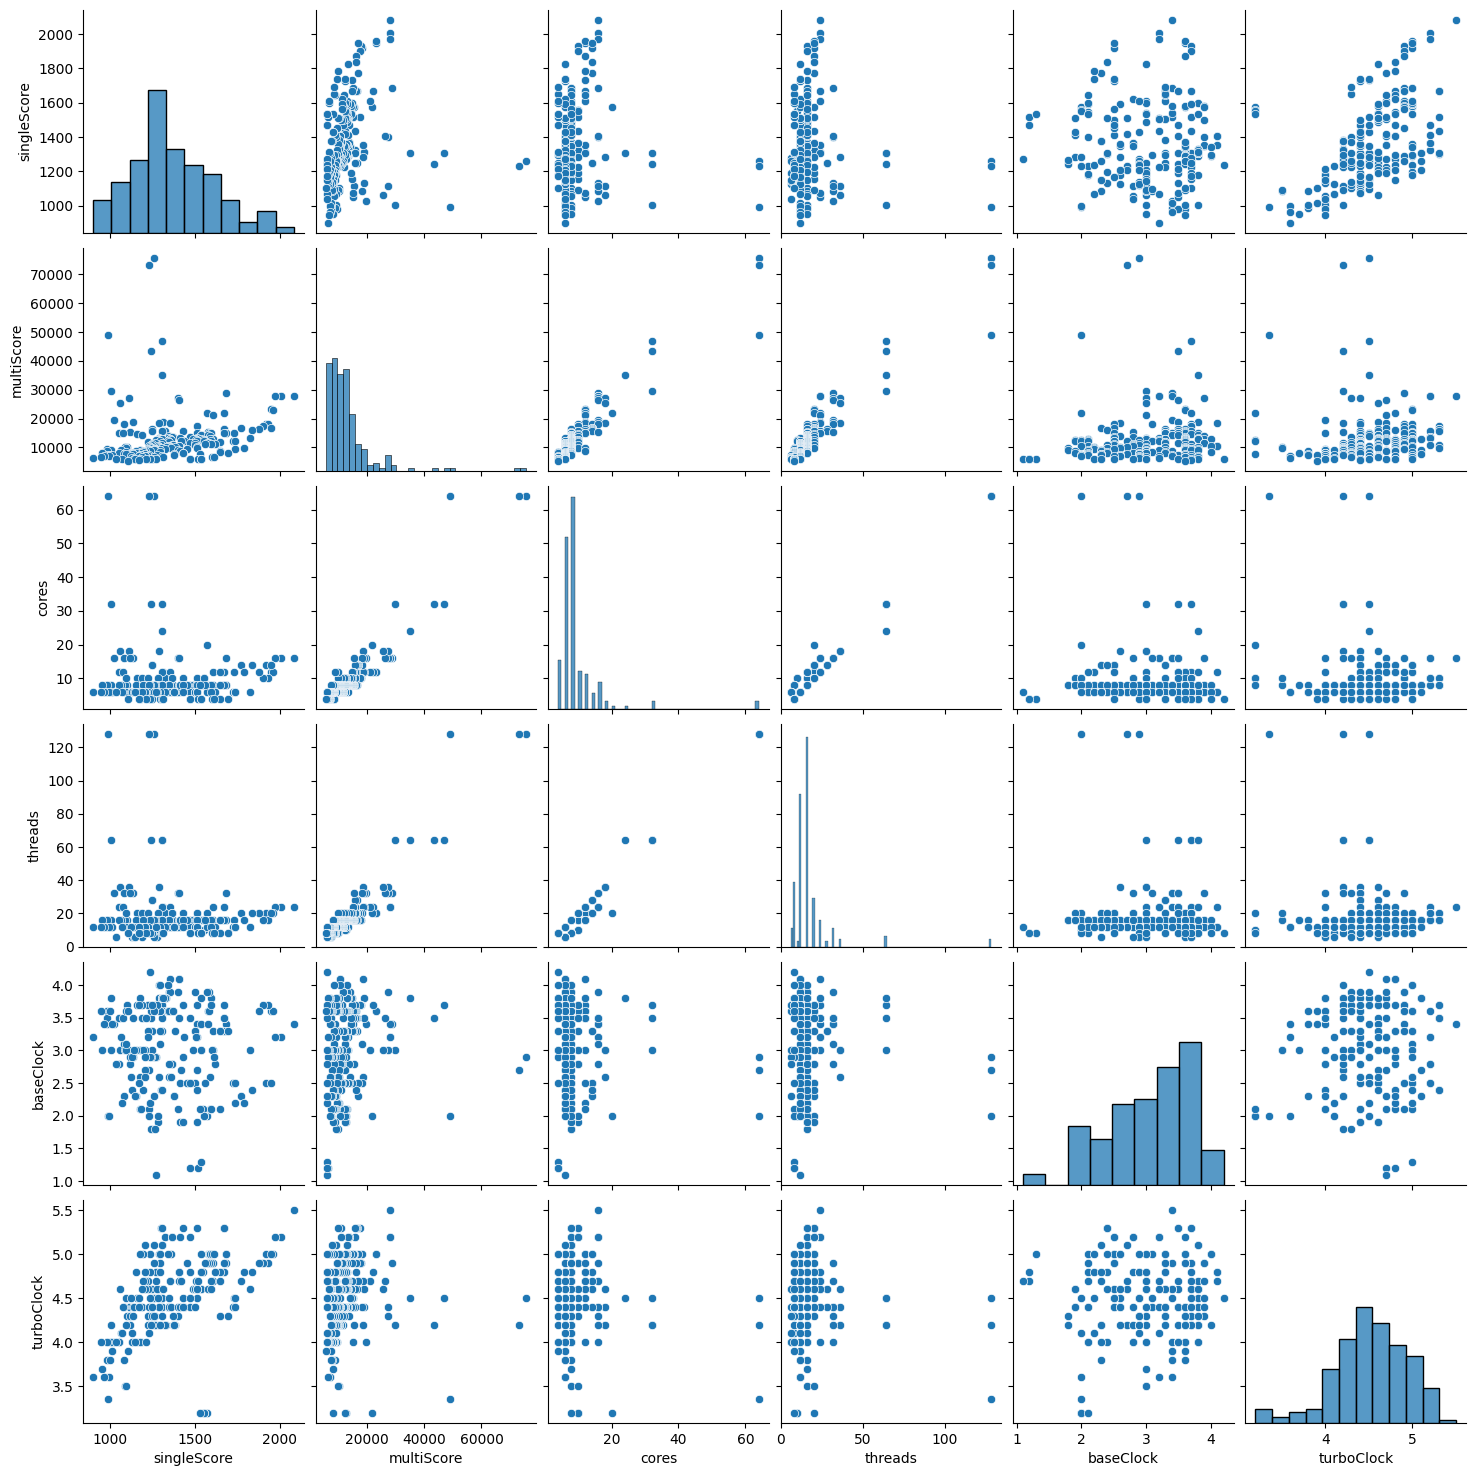

In [ ]:
# Visualisasi pairplot antar kolom
kolom = ['manufacturer','cpuName','singleScore', 'multiScore', 'cores', 'threads', 'baseClock', 'turboClock']
sns.pairplot(df[kolom])
plt.show()


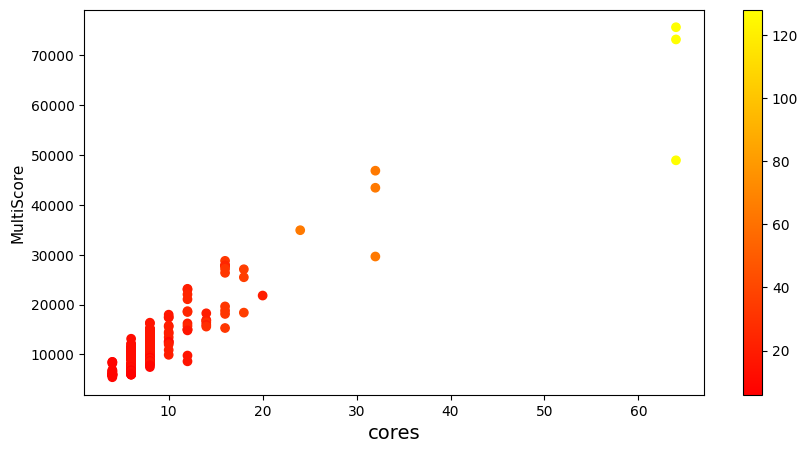

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
x = ax.scatter(df['cores'], df['multiScore'], c=df['threads'], cmap='autumn')

ax.set_xlabel('cores', size=14)
ax.set_ylabel('MultiScore', size=11)

fig.colorbar(x)
plt.show()

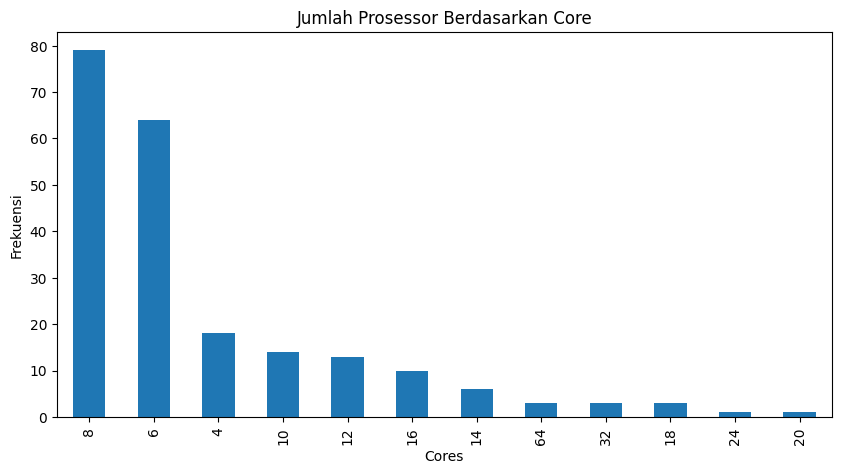

In [ ]:
df.cores.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Jumlah Prosessor Berdasarkan Core")
plt.ylabel('Frekuensi')
plt.xlabel('Cores');

### **Regresi Linear**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# Memilih fitur dan target
X = df[['cores']]
y = df[['multiScore']]

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Membuat model regresi linear
model = LinearRegression()


In [ ]:
# Melatih model menggunakan data latih
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Coefficient dan Intercept
print ('Coefficients: ', model.coef_)
print ('Intercept: ', model.intercept_)

Coefficients:  [[1050.81049158]]
Intercept:  [3240.59280812]


Text(0.5, 1.0, 'Scatter Plot dan Garis Regresi')

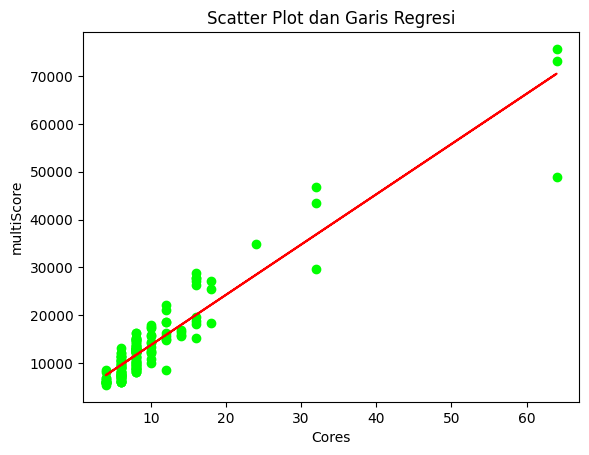

In [ ]:
# Visualisasi dengan scatter plot

plt.scatter(X_train, y_train,  color='lime')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel('Cores')
plt.ylabel('multiScore')
plt.title('Scatter Plot dan Garis Regresi')

In [ ]:
# Memprediksi harga menggunakan data uji
y_pred = model.predict(X_test)

print('Data asli: \n',y_test[0:10])
print('\n')
print('Hasil prediksi: \n',y_pred[0:10])

Data asli: 
      multiScore
200        6093
212        5778
138        9356
176        7445
15        23168
111       10654
168        7850
73        12873
204        6033
139        9346


Hasil prediksi: 
 [[ 7443.83477444]
 [ 7443.83477444]
 [ 9545.45575759]
 [ 9545.45575759]
 [15850.31870706]
 [11647.07674075]
 [11647.07674075]
 [11647.07674075]
 [ 9545.45575759]
 [11647.07674075]]


### **Evaluasi dengan MSE, RMSE, dan MAE**

In [ ]:
# Menghitung nilai MSE, RMSE, dan MAE
print('Mean Squarred Error (MSE): %.2f ' % mean_squared_error(y_pred, y_test))
print('Root Mean Squearred Error (RMSE): %.2f ' % np.sqrt(mean_squared_error(y_pred, y_test)))
print('Mean Absolute Error (MAE): %.2f ' % mean_absolute_error(y_pred, y_test))



Mean Squarred Error (MSE): 8485973.65 
Root Mean Squearred Error (RMSE): 2913.07 
Mean Absolute Error (MAE): 2265.89 
